# EDA followed by Predictive Analysis on MRI- Biopsy dataset
# The .xls file “MRI_Biopsy_Data” contains clinical, MRI, biopsy, and histopathological variables. As MRI is evaluated according to the Prostate Imaging and Reporting Data System (PI-RADS). PI-RADS is a standardized scoring system to interpret and judge findings in prostate MRI on a scale from 1 (highly likely benign) to 5 (highly likely suspect for a clinically significant prostate cancer; csPCa). Therefore, in this data we can classify PIRAD to determine the intensity of prostate cancer.

In [189]:
#importing the basic libraries
import pandas as pd
import numpy as np
from datetime import datetime
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns


#import basic modules

from sklearn.utils import resample
import warnings
warnings.filterwarnings("ignore")


import seaborn as sb
import matplotlib.pyplot as plt        
%matplotlib inline
from datetime import date,datetime

from dateutil.parser import parse

# Import label encoder 
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder 

#import feature selection modules
from sklearn.feature_selection import mutual_info_classif,RFE,RFECV
from sklearn.feature_selection import SelectFromModel
from sklearn.decomposition import PCA

#import classification modules
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier


#import classification evaluation
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,log_loss
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve 
from sklearn.metrics import auc 
from sklearn.metrics import f1_score

In [190]:
#!pip install xlrd

In [192]:
#read the CSV file
mri_biopsy = pd.read_excel("MRI_Biopsy_Data.xls")
xls = pd.ExcelFile('MRI_Biopsy_Data.xls')
df1 = pd.read_excel(xls, 'Baseline')
df2 = pd.read_excel(xls, 'Biopsy')

In [96]:
df1.head(10)

,Age,PSA,Volume,PSAD,PIRADS,ISUP
0,48,2.91,50.0,0.058200,1,0
1,54,12.30,55.0,0.223636,2,0
2,69,5.91,37.2,0.158871,2,0
3,46,3.02,14.0,0.215714,2,0
4,65,5.64,102.5,0.055024,2,0
5,72,11.81,63.8,0.185110,2,0
6,66,5.25,29.7,0.176768,2,0
7,56,6.80,21.0,0.323810,2,0
8,58,8.87,47.0,0.188723,2,0
9,46,5.35,20.6,0.259709,2,0


In [97]:
df2.head(10)

,PIRADS,Gleason_SB_TB,Gleason_TB,Gleason_SB,Scanner,IL_Localisation*,IL_Diameter*
0,1.0,0,0.0,0.0,3.0,2,7.0
1,2.0,0,0.0,0.0,1.0,1,18.0
2,2.0,0,0.0,0.0,1.0,2,8.0
3,2.0,0,0.0,0.0,1.0,1,15.0
4,2.0,0,0.0,0.0,1.0,1,12.0
5,2.0,0,0.0,0.0,1.0,1,19.0
6,2.0,0,0.0,0.0,1.0,1,8.0
7,2.0,0,0.0,0.0,2.0,1,11.0
8,2.0,0,0.0,0.0,3.0,2,11.0
9,2.0,0,0.0,0.0,3.0,2,24.0


In [98]:
mri_biopsy = pd.merge(df1, df2)
mri_biopsy

,Age,PSA,Volume,PSAD,PIRADS,ISUP,Gleason_SB_TB,Gleason_TB,Gleason_SB,Scanner,IL_Localisation*,IL_Diameter*
0,48,2.91,50.0,0.058200,1,0,0,0.0,0.0,3.0,2,7.0
1,54,12.30,55.0,0.223636,2,0,0,0.0,0.0,1.0,1,18.0
2,54,12.30,55.0,0.223636,2,0,0,0.0,0.0,1.0,2,8.0
3,54,12.30,55.0,0.223636,2,0,0,0.0,0.0,1.0,1,15.0
4,54,12.30,55.0,0.223636,2,0,0,0.0,0.0,1.0,1,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...
219706,65,6.34,25.0,0.253600,5,5,9,9.0,9.0,1.0,2,13.0
219707,65,6.34,25.0,0.253600,5,5,9,9.0,9.0,1.0,1,14.0
219708,65,6.34,25.0,0.253600,5,5,10,10.0,9.0,1.0,2,10.0
219709,65,6.34,25.0,0.253600,5,5,10,10.0,10.0,1.0,1,18.0


In [99]:
mri_biopsy.dtypes

Age                   int64
PSA                 float64
Volume              float64
PSAD                float64
PIRADS                int64
ISUP                  int64
Gleason_SB_TB        object
Gleason_TB          float64
Gleason_SB          float64
Scanner             float64
IL_Localisation*     object
IL_Diameter*        float64
dtype: object

In [100]:
#After catering all incorrect values, doing typecasting
mri_biopsy['Age'] = mri_biopsy['Age'].astype(int) 
mri_biopsy['PSA'] = mri_biopsy['PSA'].astype(float) 
mri_biopsy['Volume'] = mri_biopsy['Volume'].astype(float) 
mri_biopsy['PSAD'] = mri_biopsy['PSAD'].astype(float) 
mri_biopsy['PIRADS'] = mri_biopsy['PIRADS'].astype(float) 
mri_biopsy['ISUP'] = mri_biopsy['ISUP'].astype(float) 
mri_biopsy['Gleason_SB_TB'] = mri_biopsy['Gleason_SB_TB'].astype(int)
mri_biopsy['Gleason_TB'] = mri_biopsy['Gleason_TB'].astype(float)
mri_biopsy['Gleason_SB'] = mri_biopsy['Gleason_SB'].astype(float)
mri_biopsy['Scanner'] = mri_biopsy['Scanner'].astype(float)
# mri_biopsy['IL_Localisation*'] = mri_biopsy['IL_Localisation*'].astype(float)
mri_biopsy['IL_Diameter*'] = mri_biopsy['IL_Diameter*'].astype(float) 

In [101]:
mri_biopsy.isnull().sum()

Age                     0
PSA                  3112
Volume               5830
PSAD                 5830
PIRADS                  0
ISUP                    0
Gleason_SB_TB           0
Gleason_TB              0
Gleason_SB              0
Scanner             11628
IL_Localisation*     8974
IL_Diameter*         7792
dtype: int64

In [102]:
mri_biopsy.describe()

,Age,PSA,Volume,PSAD,PIRADS,ISUP,Gleason_SB_TB,Gleason_TB,Gleason_SB,Scanner,IL_Diameter*
count,219711.000000,216599.000000,213881.000000,213881.000000,219711.000000,219711.000000,219711.000000,219711.000000,219711.000000,208083.000000,211919.000000
mean,65.075272,9.720349,53.231833,0.217624,4.028788,1.430388,4.319169,3.612521,3.384391,1.395174,13.307009
std,8.927842,6.552185,29.571406,0.182564,0.573523,1.452407,3.456614,3.597227,3.501975,0.723936,4.676724
min,30.000000,0.600000,9.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000
25%,58.000000,5.800000,33.000000,0.114198,4.000000,0.000000,0.000000,0.000000,0.000000,1.000000,10.000000
50%,66.000000,8.000000,46.000000,0.171429,4.000000,1.000000,6.000000,6.000000,0.000000,1.000000,13.000000
75%,72.000000,11.500000,65.000000,0.250915,4.000000,2.000000,7.000000,7.000000,7.000000,2.000000,15.000000
max,87.000000,74.000000,313.000000,2.475769,5.000000,5.000000,10.000000,10.000000,10.000000,4.000000,43.000000


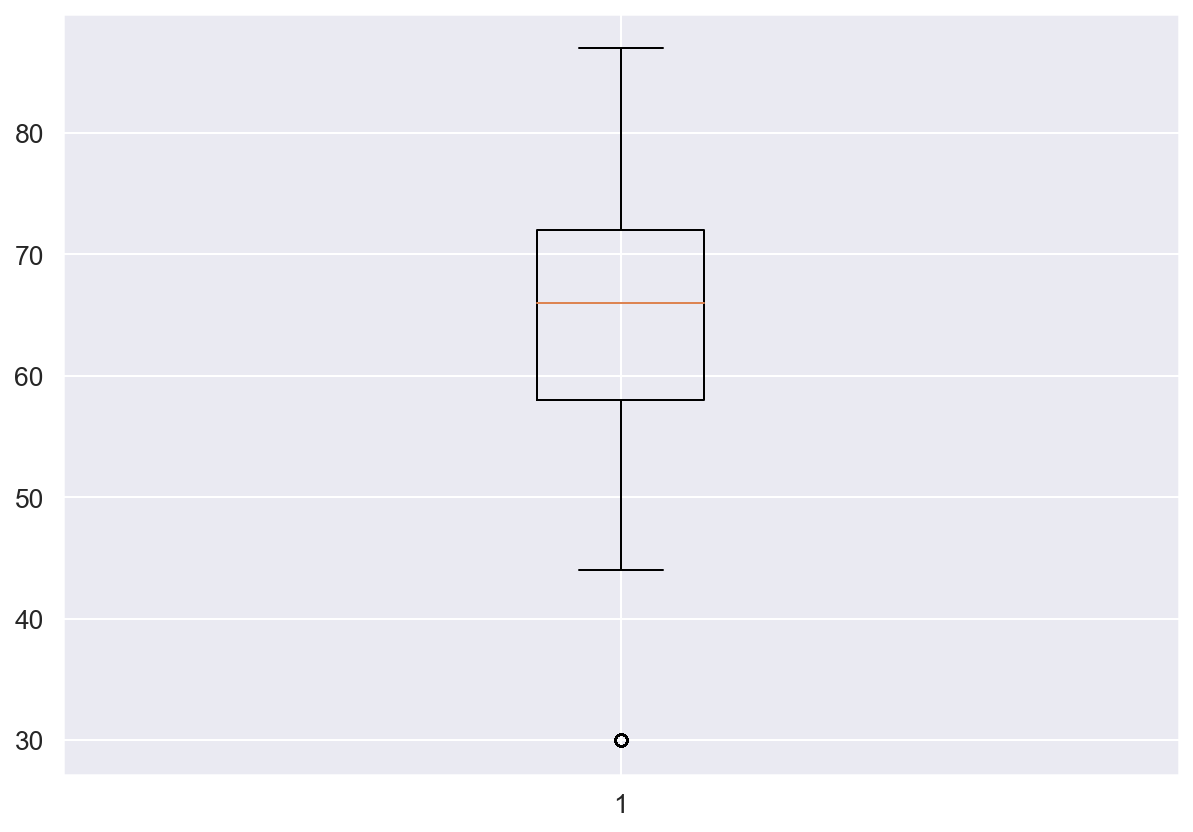

In [103]:
fig = plt.figure(figsize =(10, 7)) 
# Creating plot
plt.boxplot(mri_biopsy['Age']) 
# show plot
plt.show()

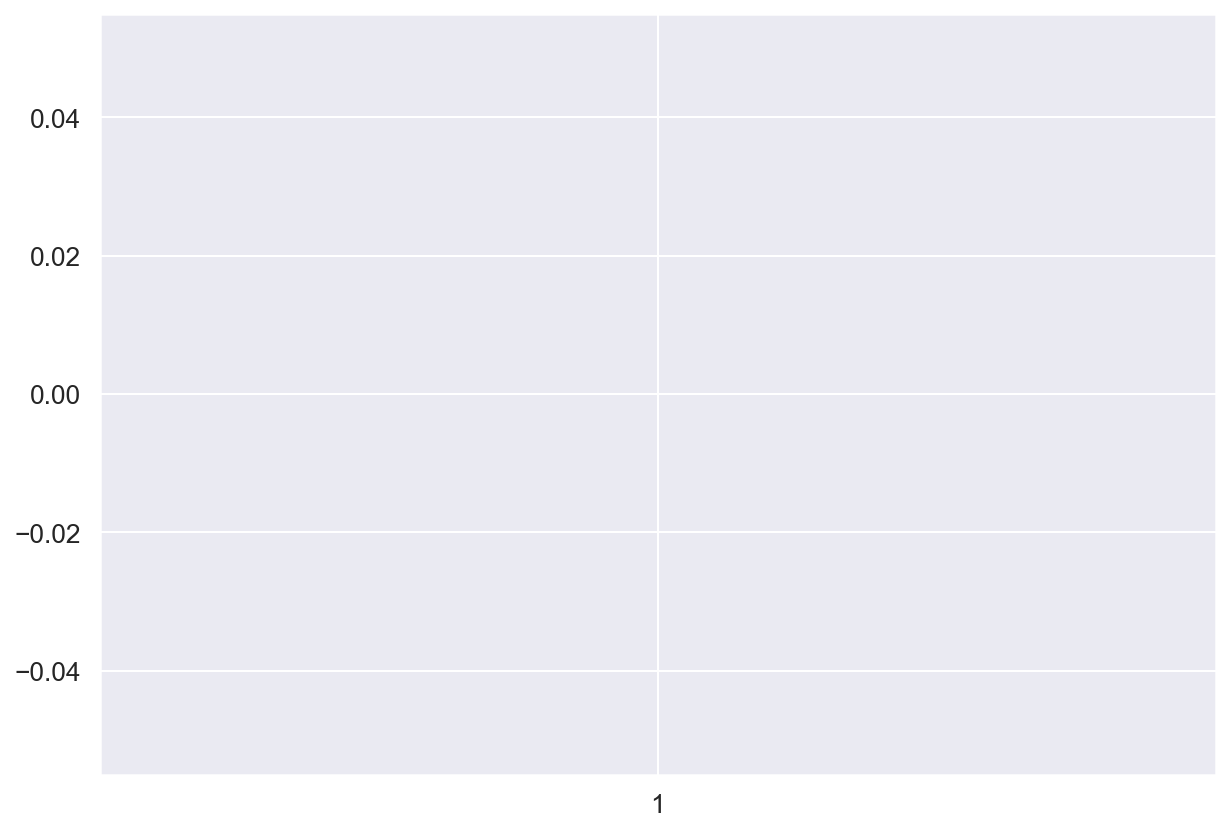

In [104]:
fig = plt.figure(figsize =(10, 7)) 
# Creating plot
plt.boxplot(mri_biopsy['PSA']) 
# show plot
plt.show()

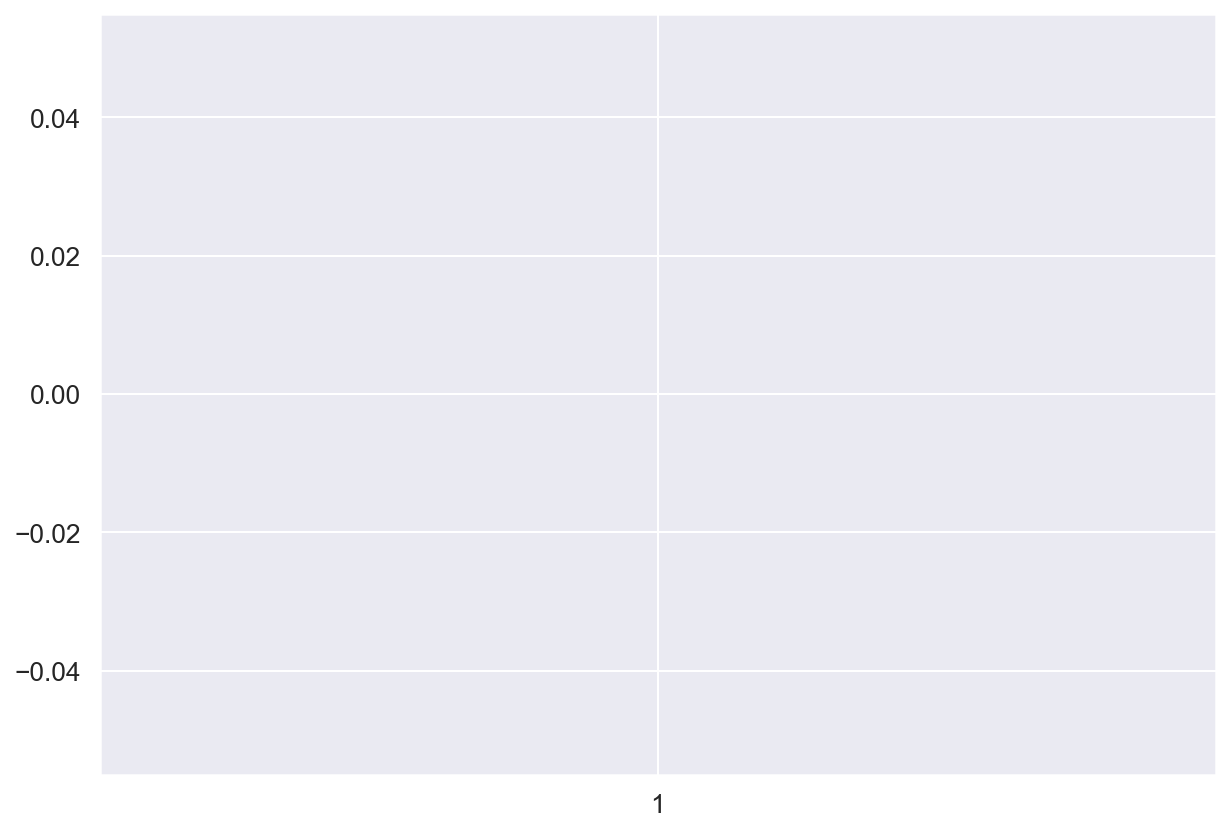

In [105]:
fig = plt.figure(figsize =(10, 7)) 
# Creating plot
plt.boxplot(mri_biopsy['Volume']) 
# show plot
plt.show()

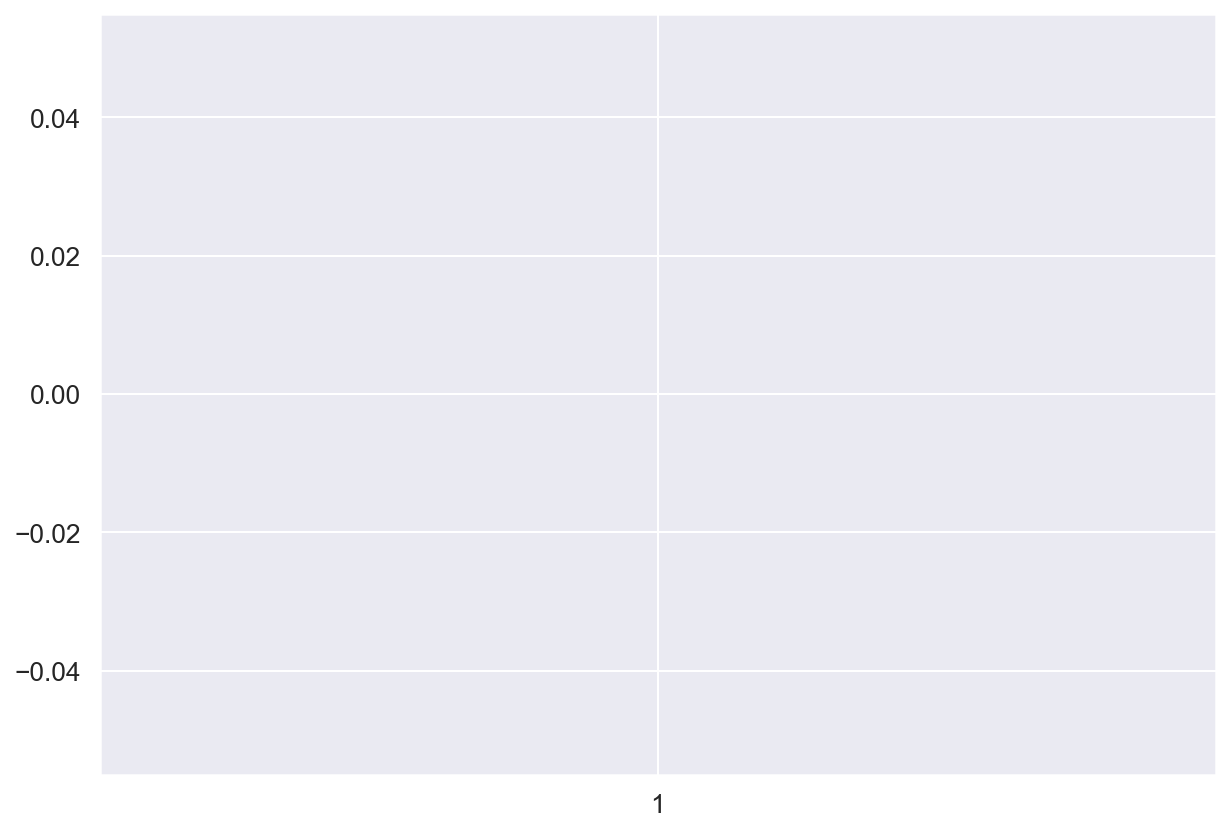

In [106]:
fig = plt.figure(figsize =(10, 7)) 
# Creating plot
plt.boxplot(mri_biopsy['PSAD']) 
# show plot
plt.show()

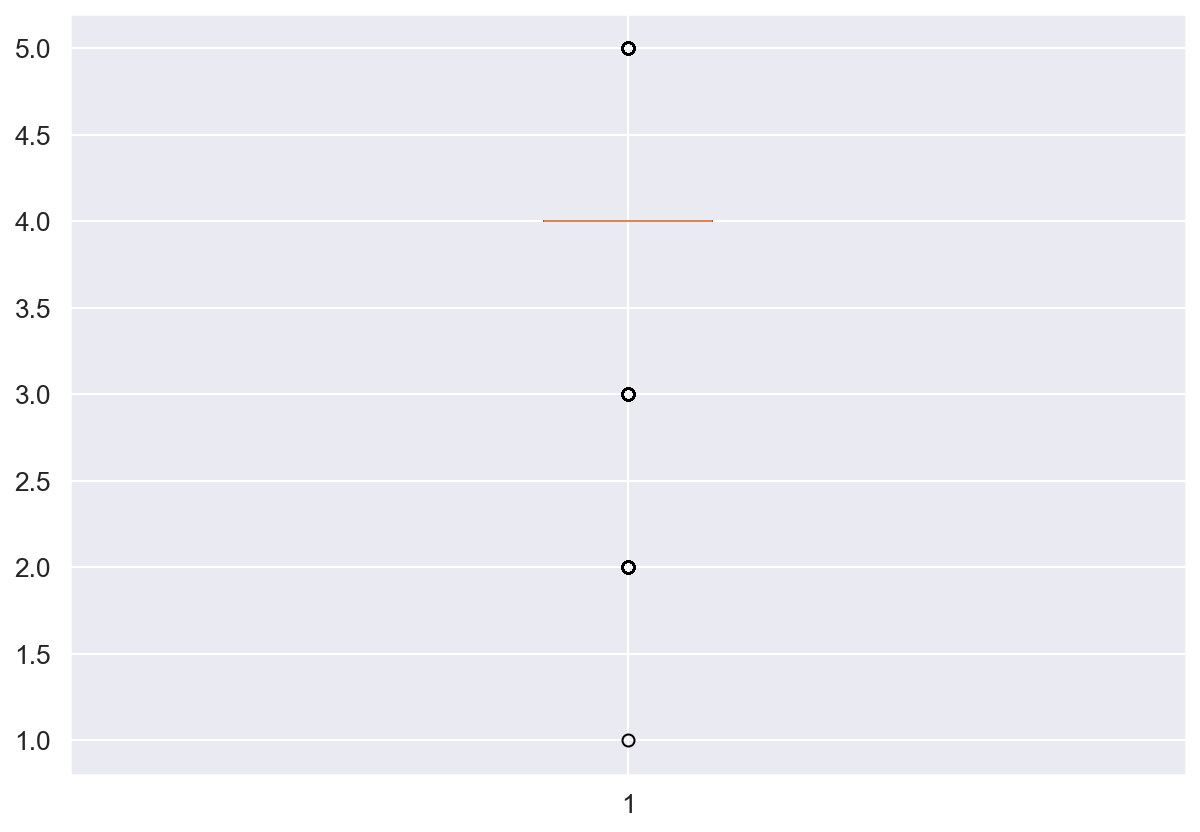

In [107]:
fig = plt.figure(figsize =(10, 7)) 
# Creating plot
plt.boxplot(mri_biopsy['PIRADS']) 
# show plot
plt.show()

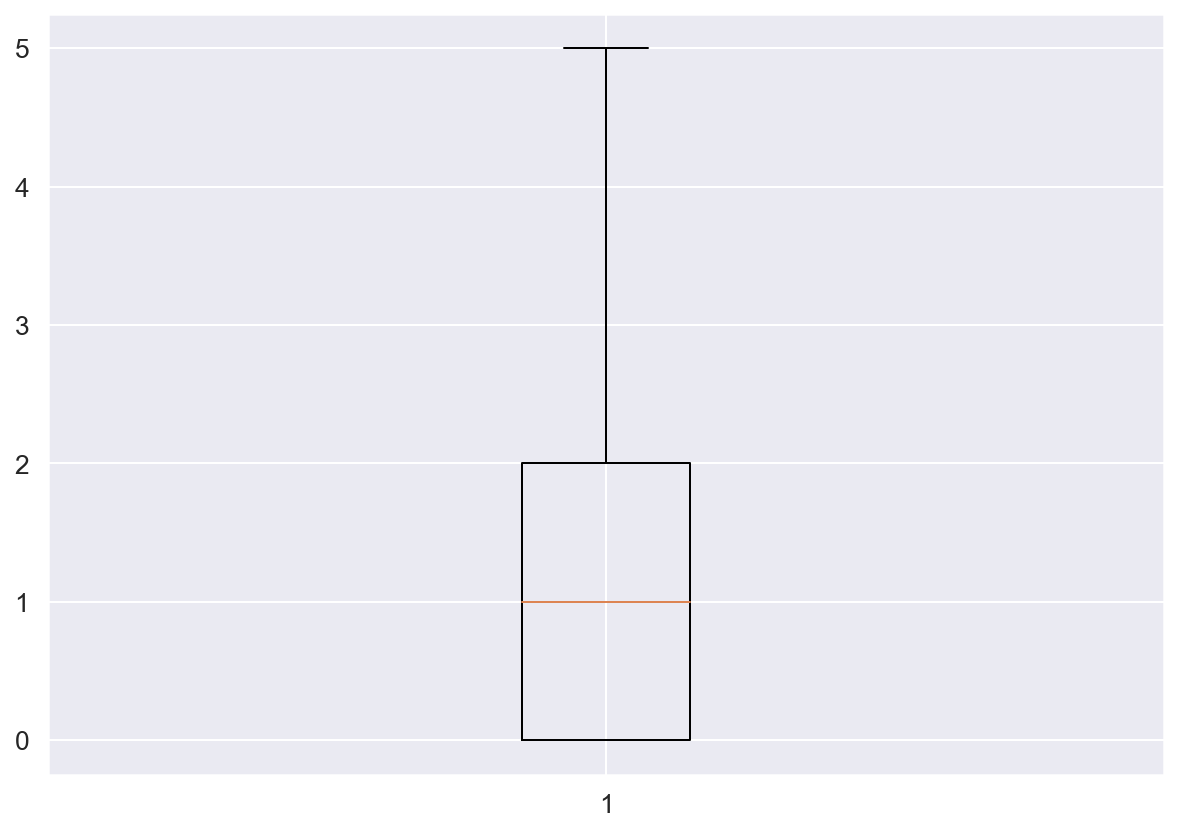

In [108]:
fig = plt.figure(figsize =(10, 7)) 
# Creating plot
plt.boxplot(mri_biopsy['ISUP']) 
# show plot
plt.show()

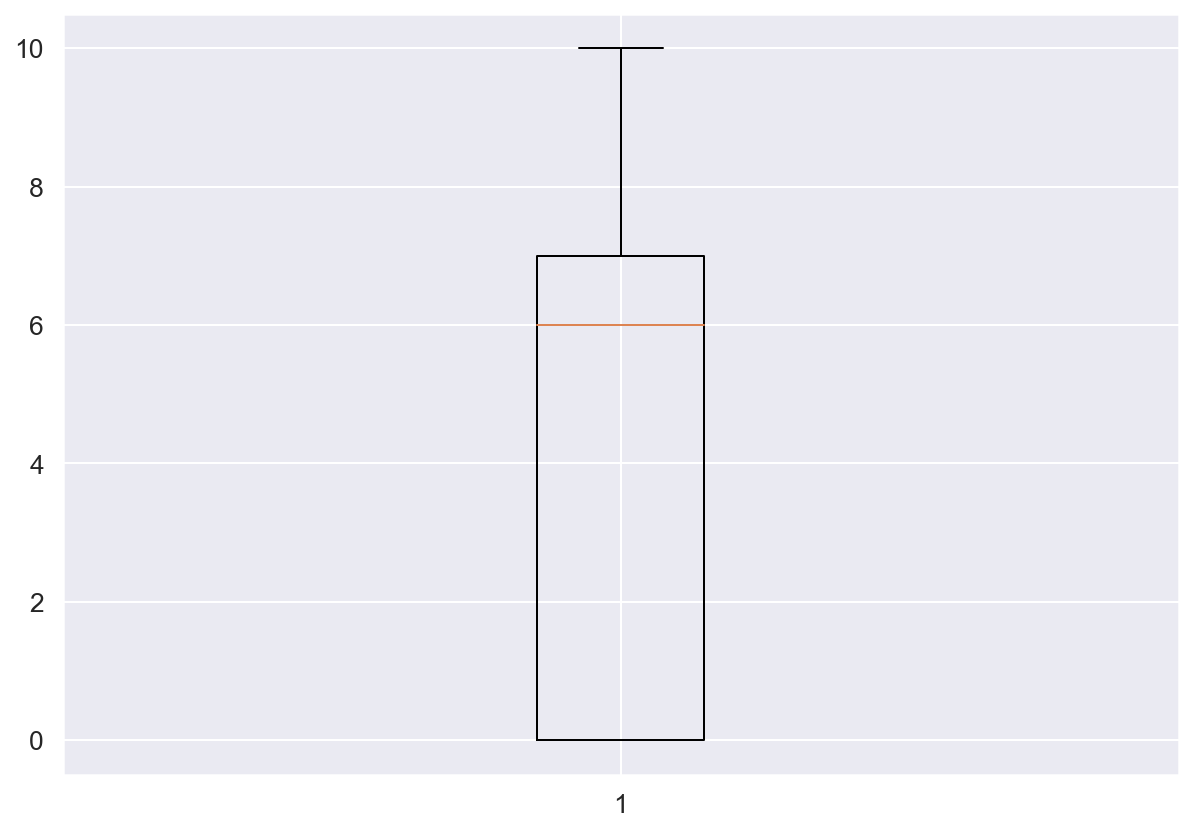

In [109]:
fig = plt.figure(figsize =(10, 7)) 
# Creating plot
plt.boxplot(mri_biopsy['Gleason_TB']) 
# show plot
plt.show()

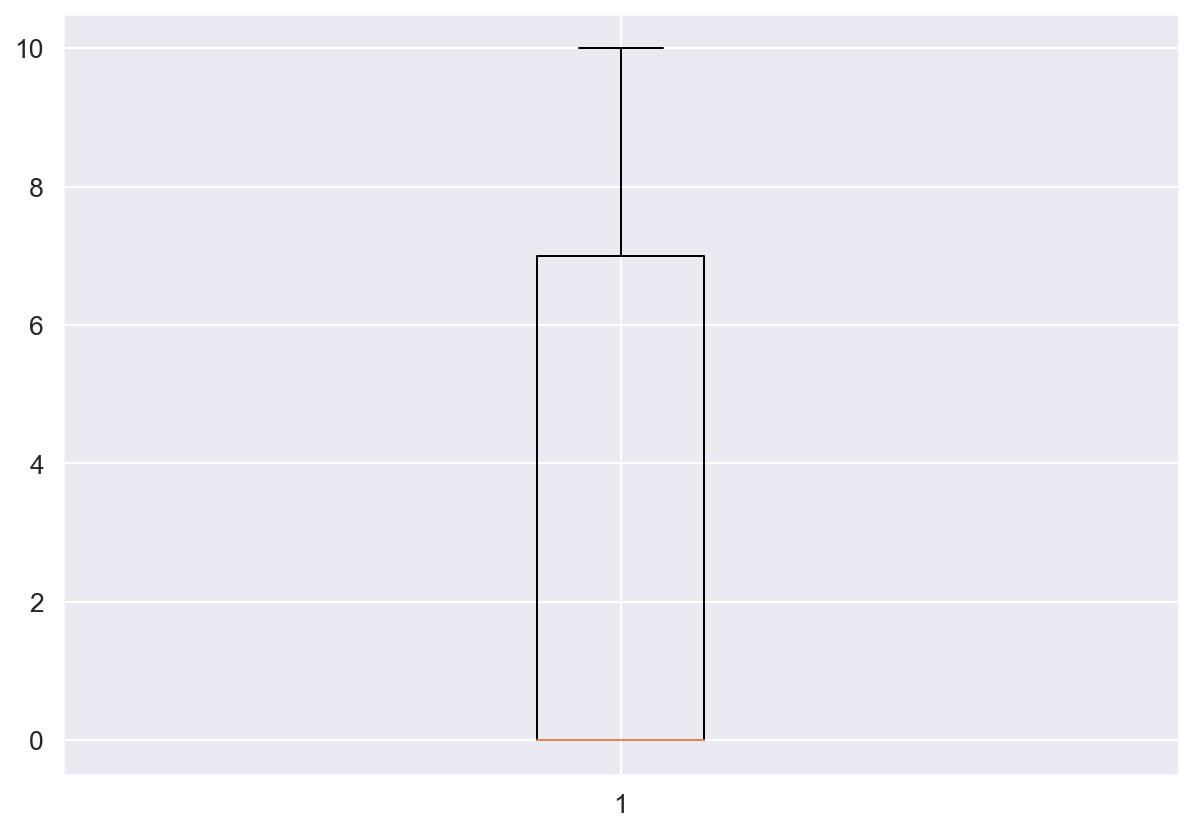

In [110]:
fig = plt.figure(figsize =(10, 7)) 
# Creating plot
plt.boxplot(mri_biopsy['Gleason_SB']) 
# show plot
plt.show()

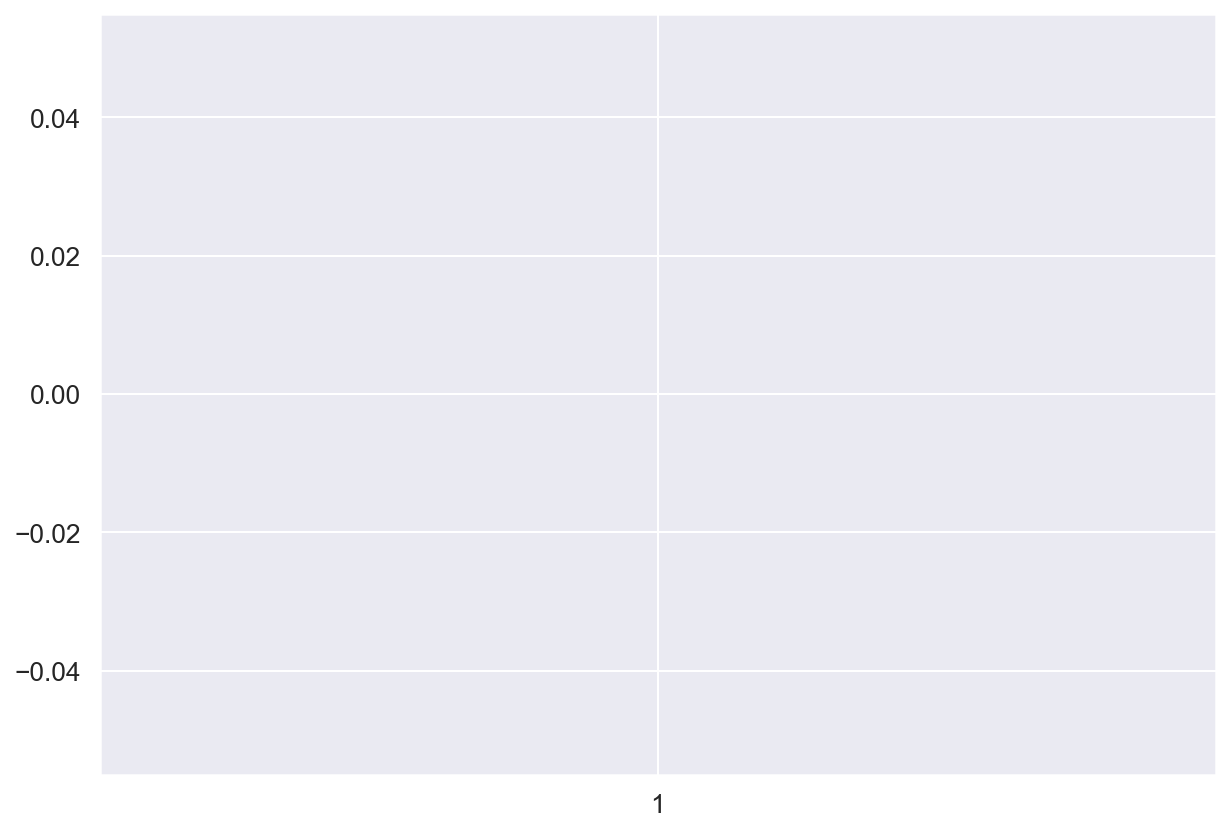

In [111]:
fig = plt.figure(figsize =(10, 7)) 
# Creating plot
plt.boxplot(mri_biopsy['Scanner']) 
# show plot
plt.show()

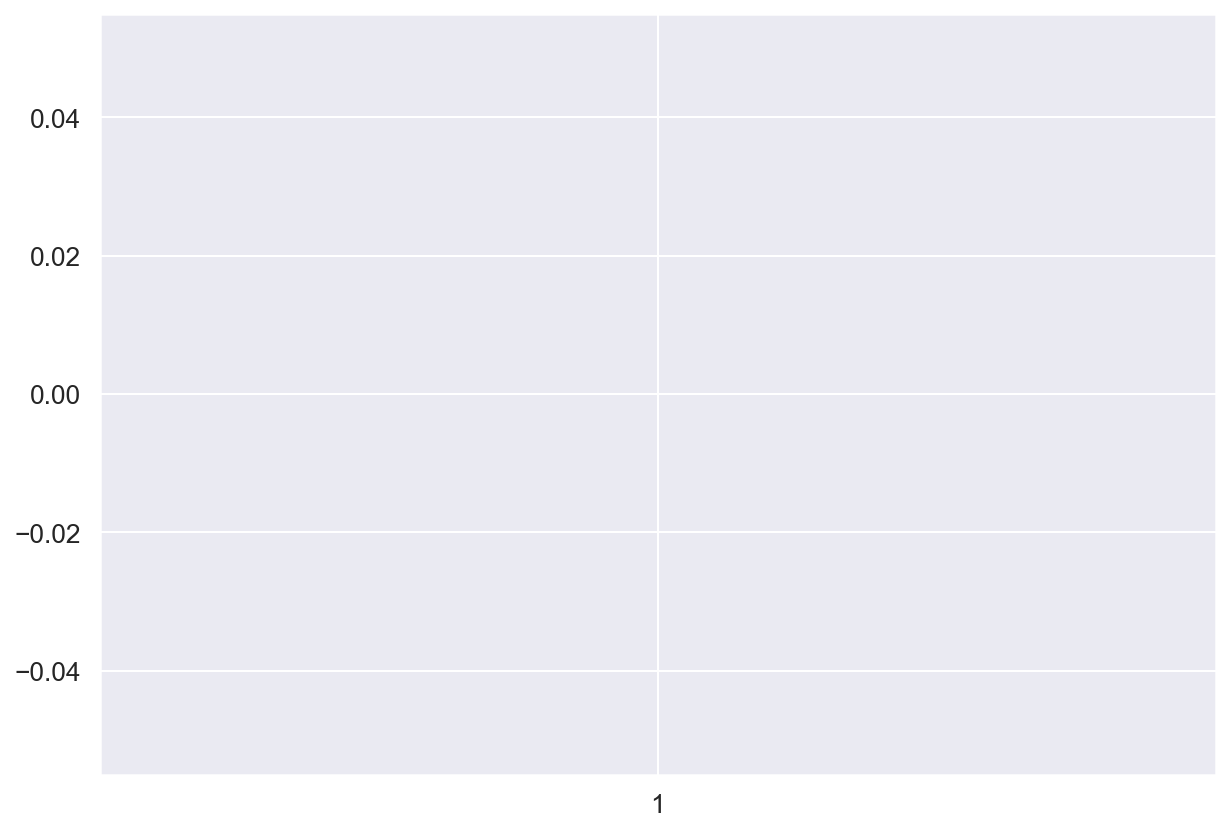

In [112]:
fig = plt.figure(figsize =(10, 7)) 
# Creating plot
plt.boxplot(mri_biopsy['IL_Diameter*']) 
# show plot
plt.show()

<AxesSubplot:>

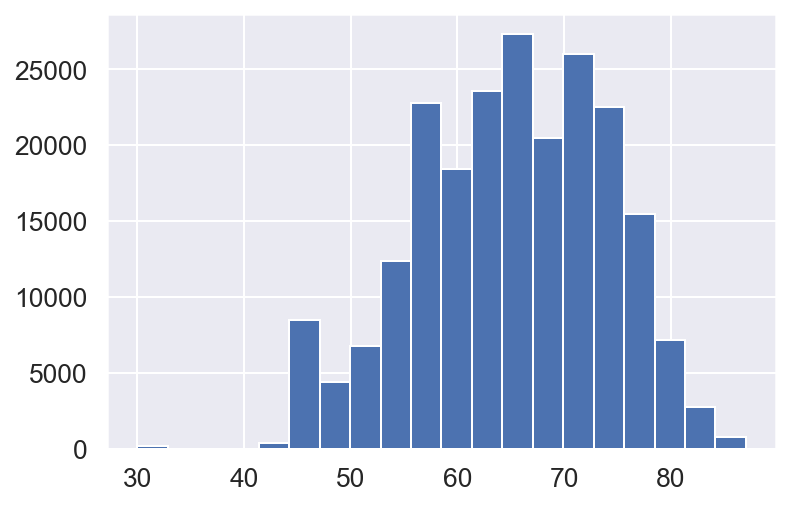

In [113]:
mri_biopsy['Age'].hist(bins=20)

<AxesSubplot:>

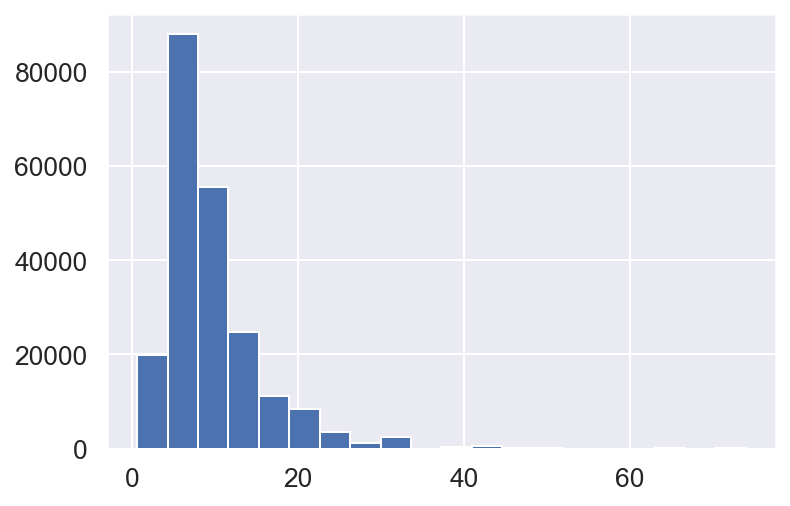

In [114]:
mri_biopsy['PSA'].hist(bins=20)

<AxesSubplot:>

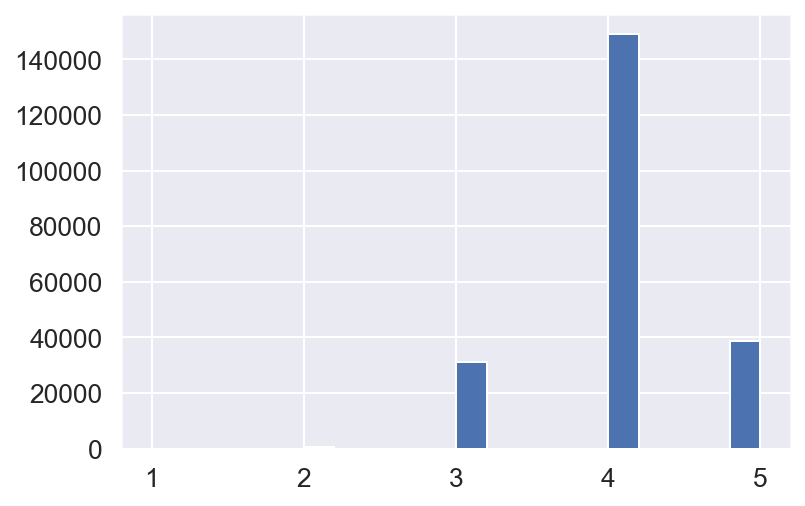

In [115]:
mri_biopsy['PIRADS'].hist(bins=20)

<AxesSubplot:>

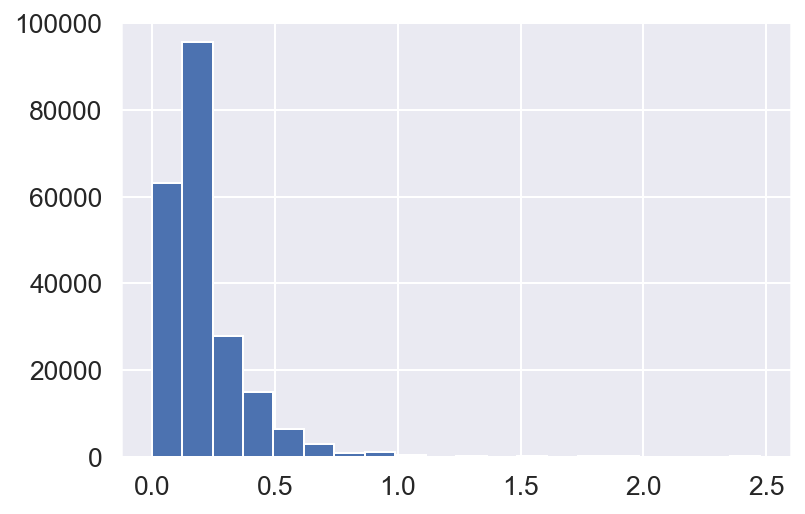

In [116]:
mri_biopsy['PSAD'].hist(bins=20)

<AxesSubplot:>

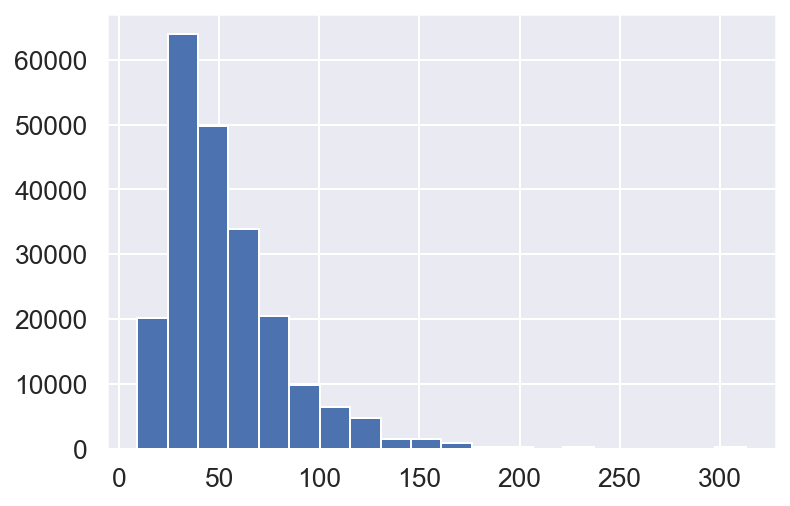

In [117]:
mri_biopsy['Volume'].hist(bins=20)

<AxesSubplot:>

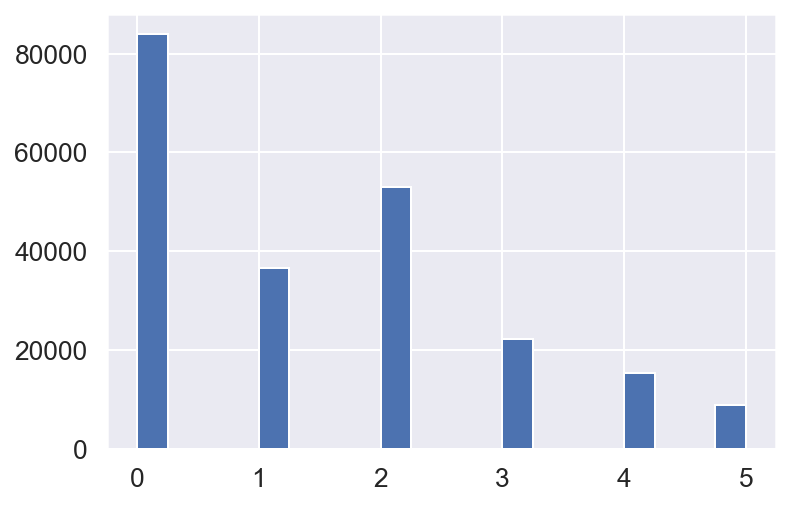

In [118]:
mri_biopsy['ISUP'].hist(bins=20)

<AxesSubplot:>

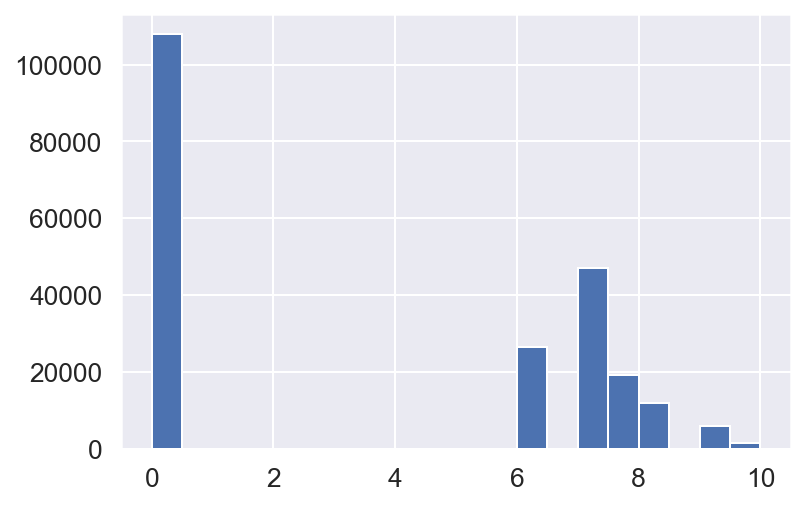

In [119]:
mri_biopsy['Gleason_TB'].hist(bins=20)


<AxesSubplot:>

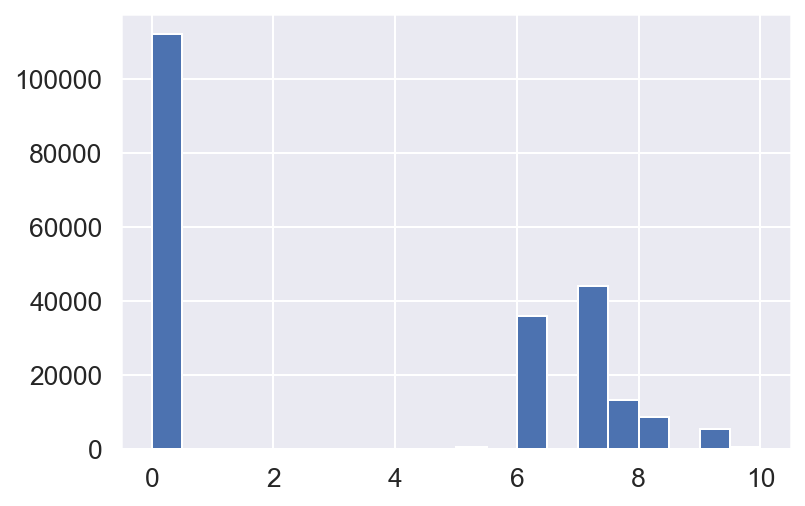

In [120]:
mri_biopsy['Gleason_SB'].hist(bins=20)

<AxesSubplot:>

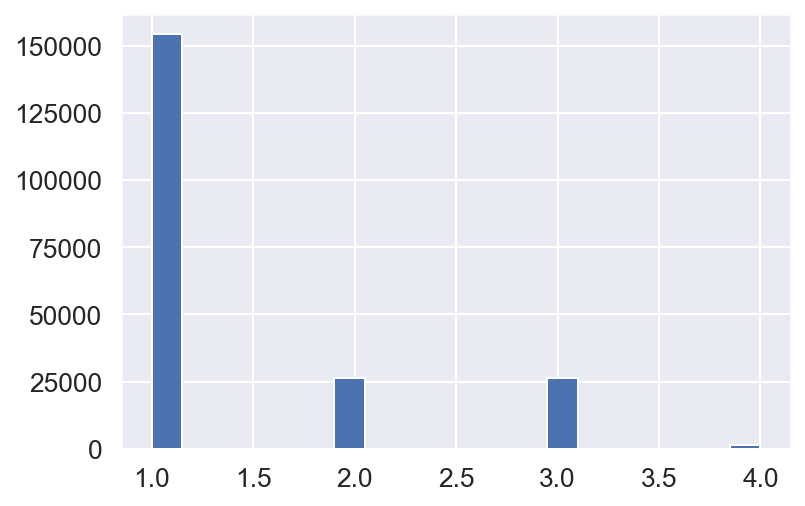

In [121]:
mri_biopsy['Scanner'].hist(bins=20)

<AxesSubplot:>

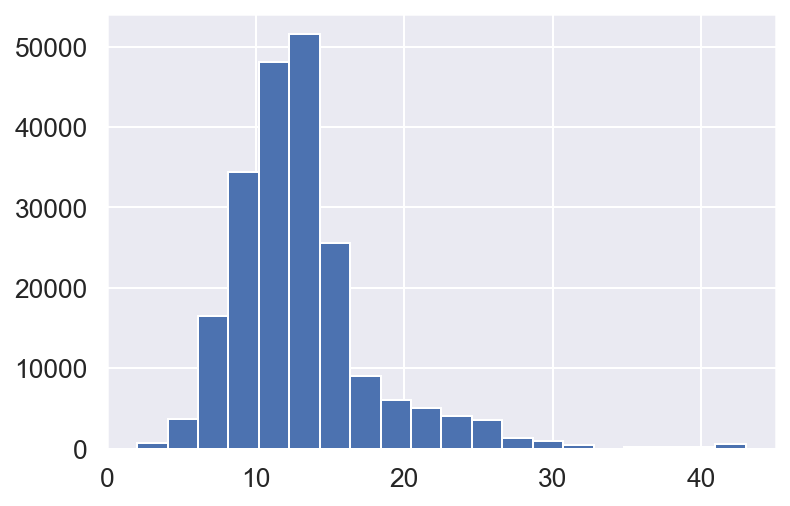

In [122]:
mri_biopsy['IL_Diameter*'].hist(bins=20)

# BoxPlot for all features

<AxesSubplot:>

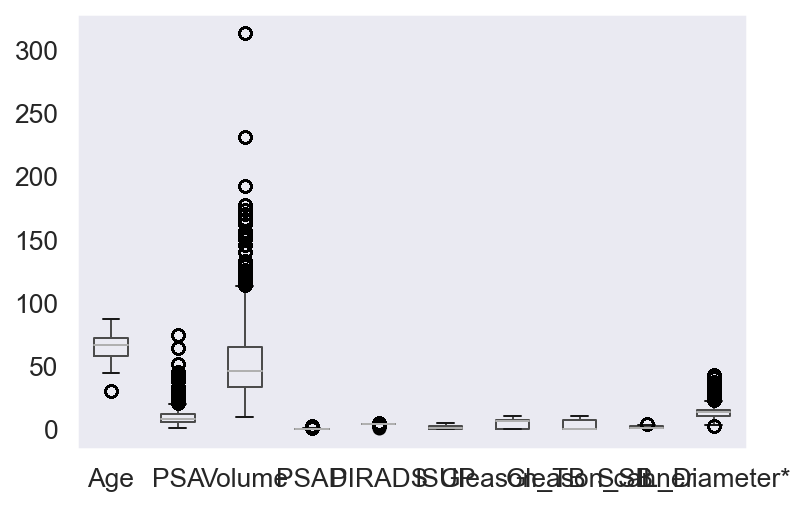

In [123]:
mri_biopsy.boxplot(column=["Age","PSA","Volume","PSAD","PIRADS","ISUP","Gleason_TB","Gleason_SB","Scanner","IL_Diameter*"], grid=False)

In [124]:
df_num = mri_biopsy.select_dtypes(include = ['float64', 'int64'])
df_num.head()

,PSA,Volume,PSAD,PIRADS,ISUP,Gleason_TB,Gleason_SB,Scanner,IL_Diameter*
0,2.91,50.0,0.058200,1.0,0.0,0.0,0.0,3.0,7.0
1,12.30,55.0,0.223636,2.0,0.0,0.0,0.0,1.0,18.0
2,12.30,55.0,0.223636,2.0,0.0,0.0,0.0,1.0,8.0
3,12.30,55.0,0.223636,2.0,0.0,0.0,0.0,1.0,15.0
4,12.30,55.0,0.223636,2.0,0.0,0.0,0.0,1.0,12.0


# Historgrams for All Features

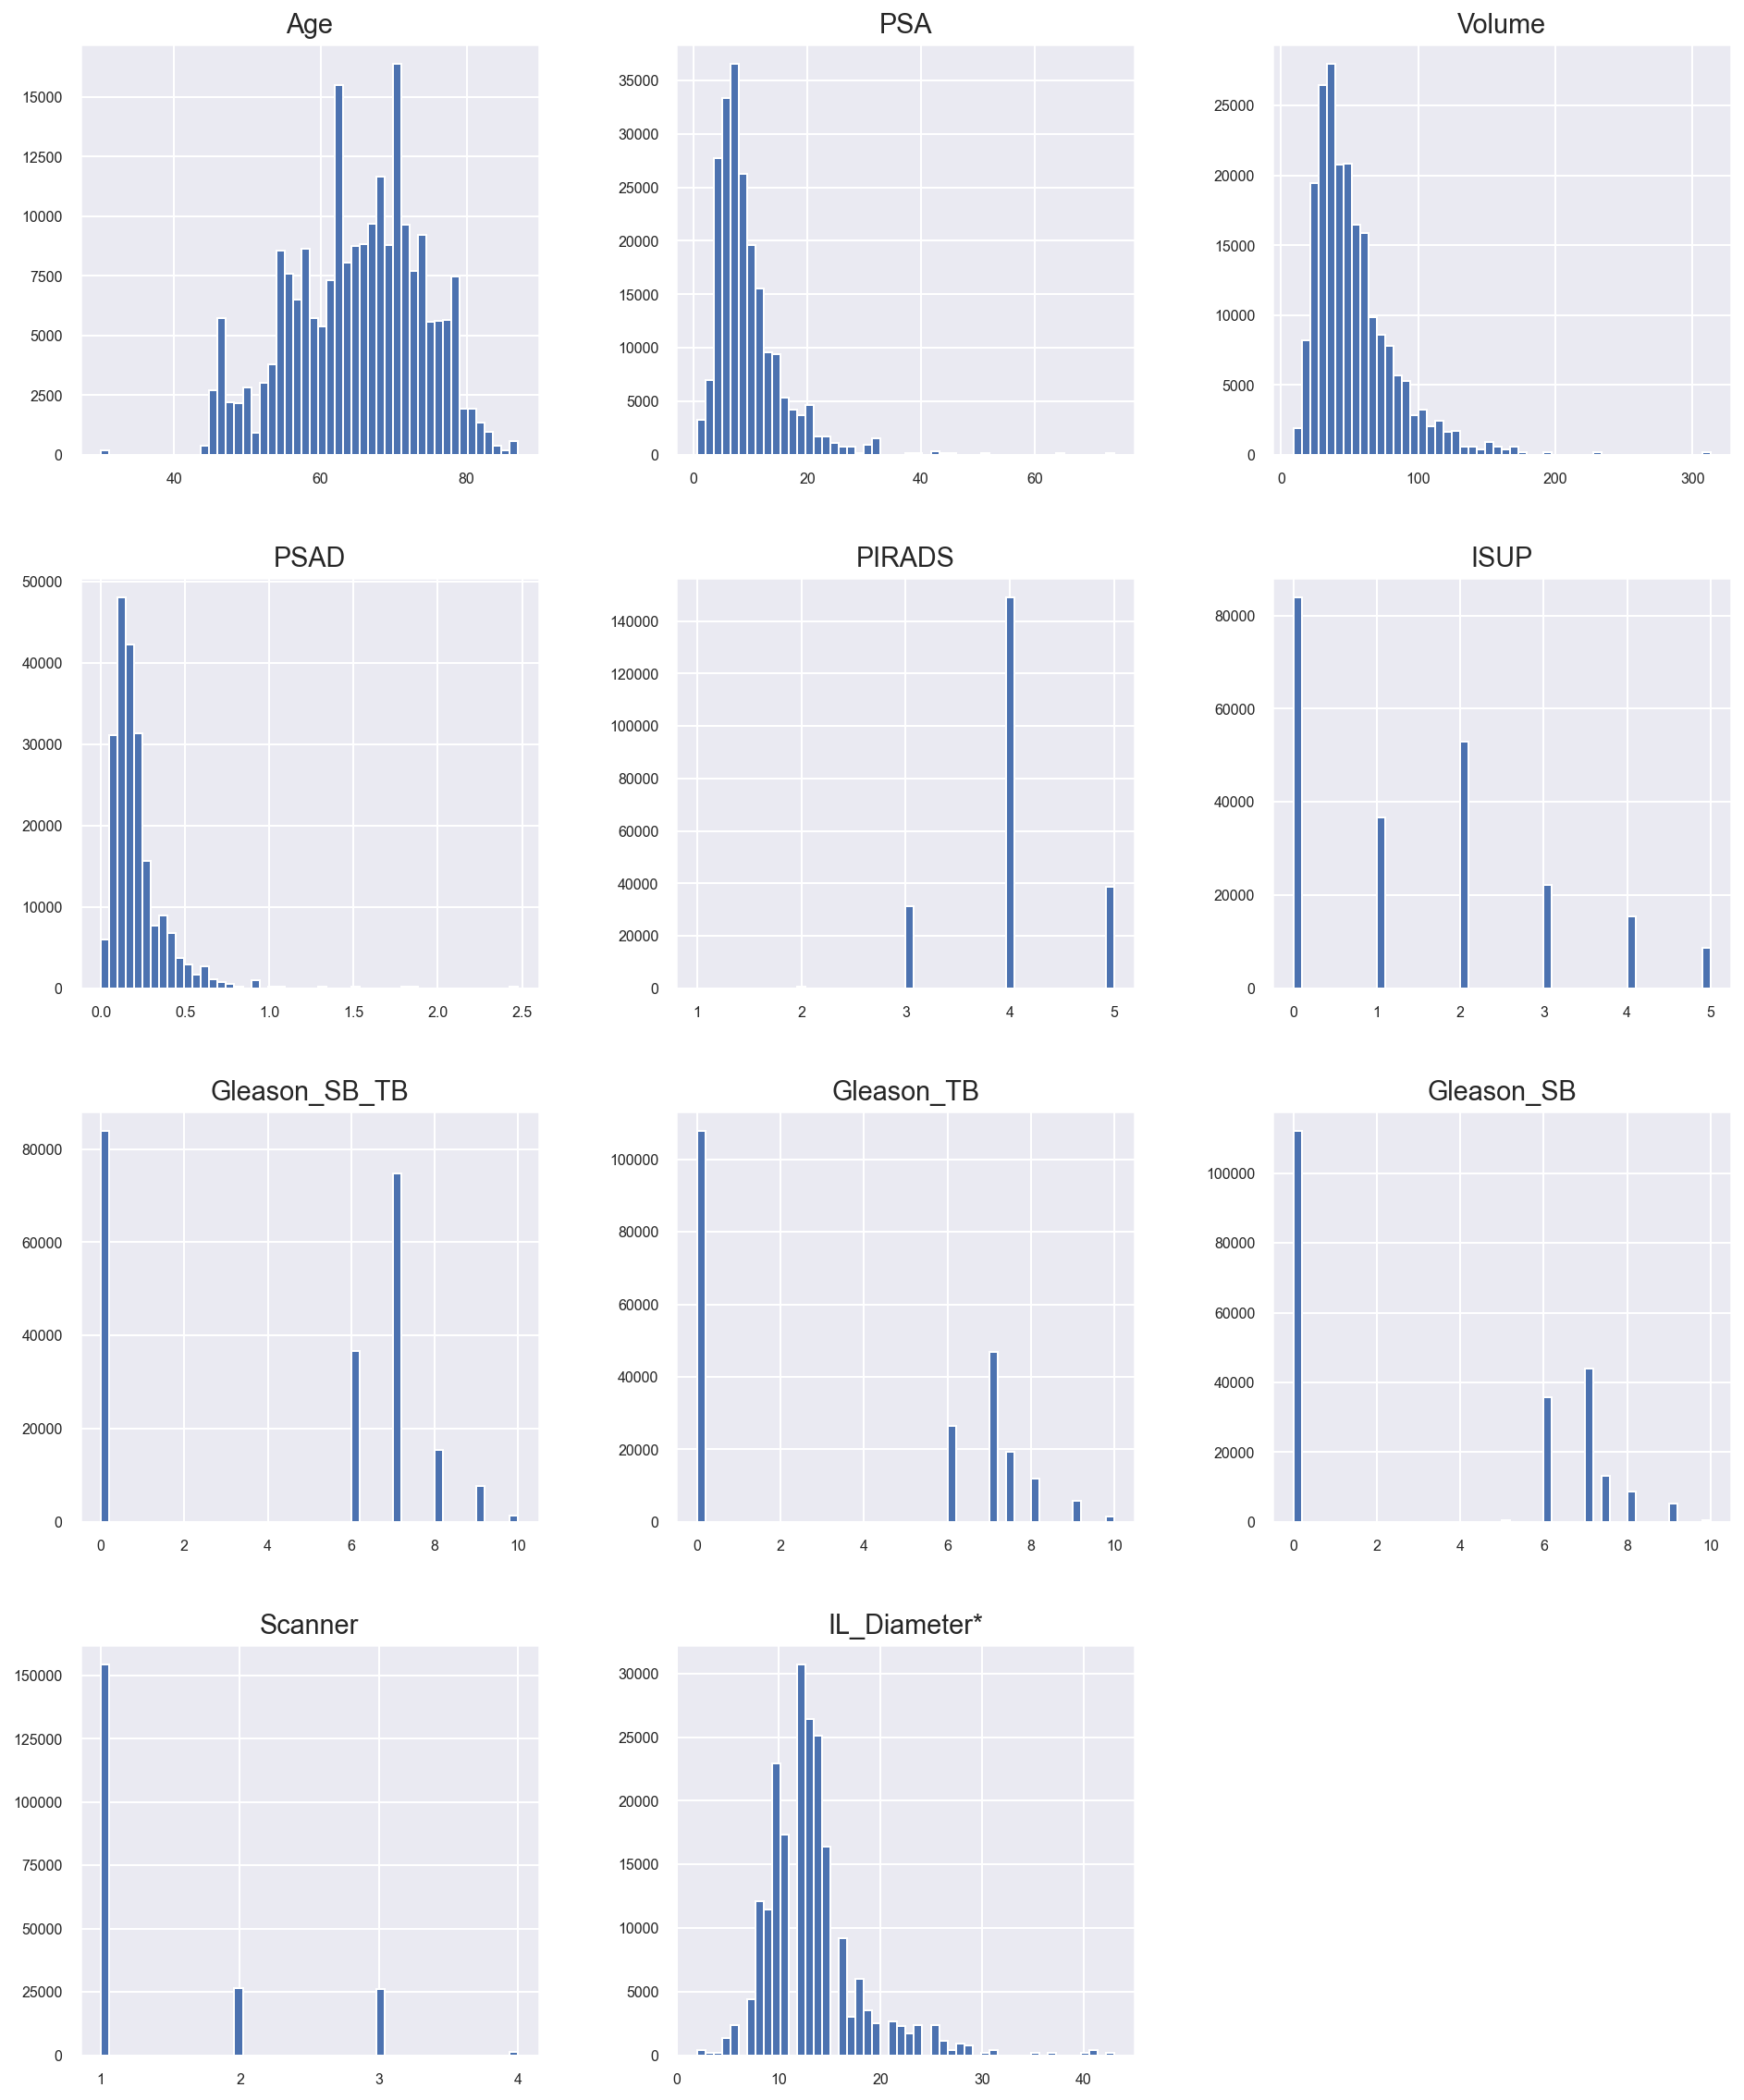

In [125]:
mri_biopsy.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

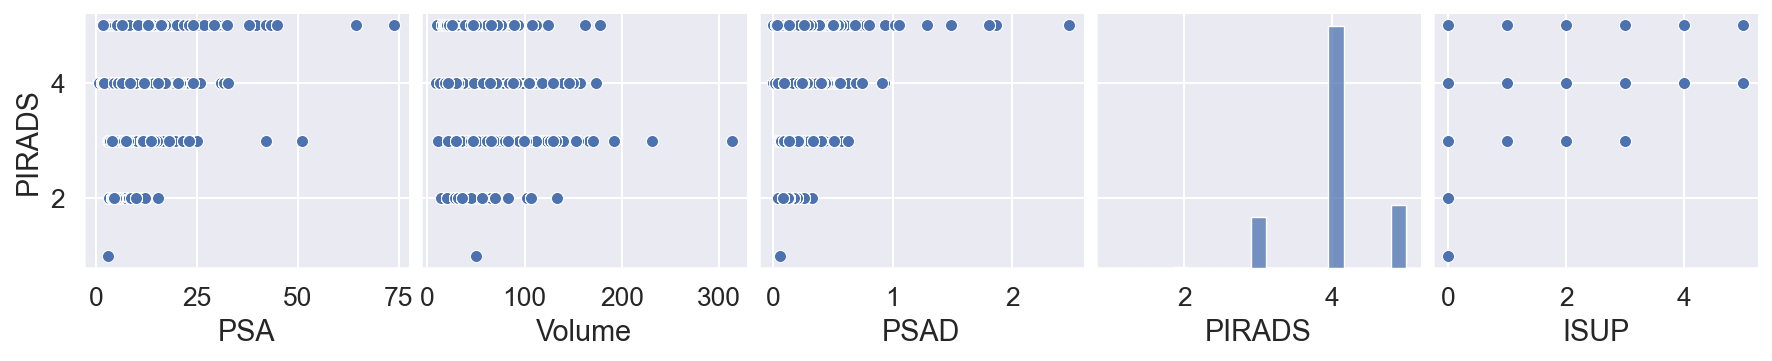

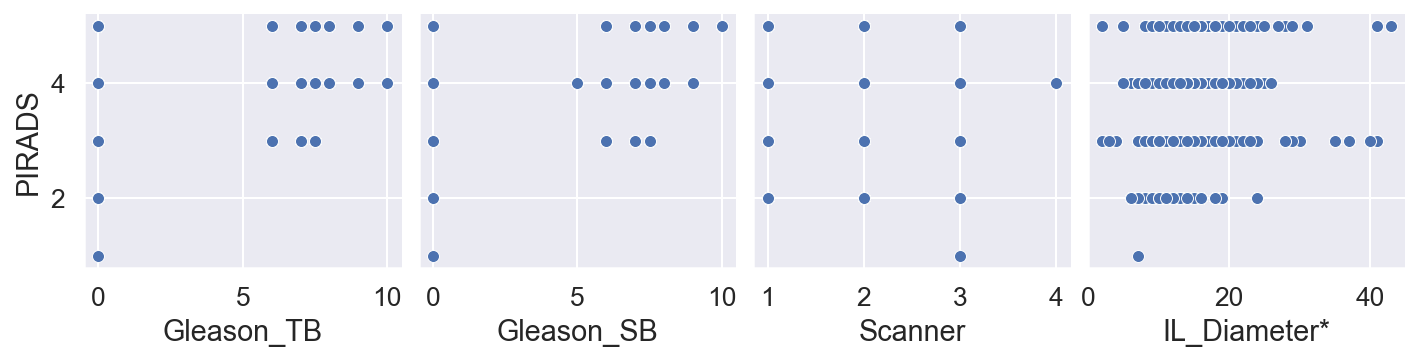

In [126]:
for i in range(0, len(df_num.columns), 5):
    sns.pairplot(data=df_num,
                x_vars=df_num.columns[i:i+5],
                y_vars=['PIRADS'])

# 1. There are a lot of missing values in each feature.
# 2. PIRADs (labels) are imbalanced has much lesser data. 


# The data is incomplete. However applying Random forest and Logistic Regression to test.

In [141]:
df_num_corr = df_num.corr()['PIRADS'][:-1] # -1 because the latest row is SalePrice
golden_features_list = df_num_corr[abs(df_num_corr) > 0.5].sort_values(ascending=False)
print("There is {} strongly correlated values with Labels:\n{}".format(len(golden_features_list), golden_features_list))

There is 2 strongly correlated values with Labels:
PIRADS    1.000000
ISUP      0.501207
Name: PIRADS, dtype: float64


# Displaying heatmaps for features with high correlation

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


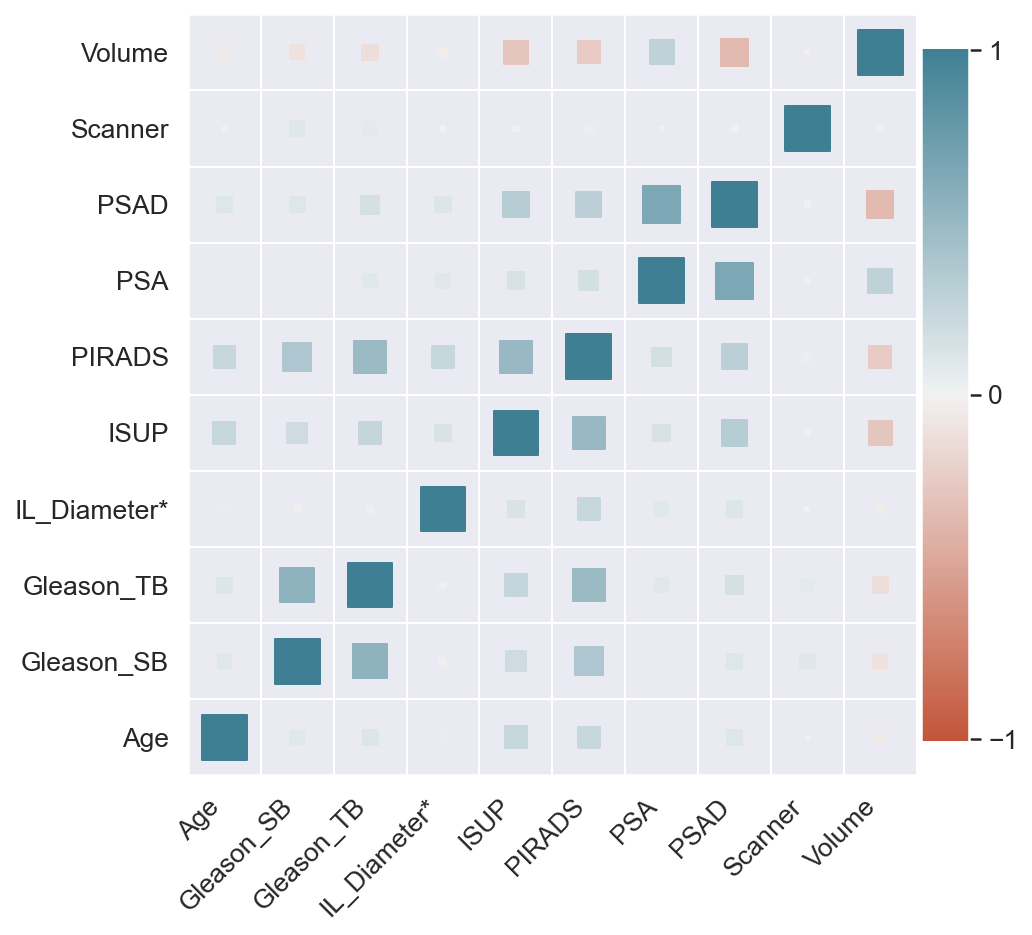

In [127]:
#Question 9
data=mri_biopsy
import pandas as pd
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 7,7 
import seaborn as sns
sns.set(color_codes=True, font_scale=1.2)

%config InlineBackend.figure_format = 'retina'
%load_ext autoreload
%autoreload 2
def heatmap(x, y, size, color):
    fig, ax = plt.subplots()
    
    # Mapping from column names to integer coordinates
    x_labels = [v for v in sorted(x.unique())]
    y_labels = [v for v in sorted(y.unique())]
    x_to_num = {p[1]:p[0] for p in enumerate(x_labels)} 
    y_to_num = {p[1]:p[0] for p in enumerate(y_labels)} 
    
    size_scale = 500
    
    n_colors = 256 # Use 256 colors for the diverging color palette
    palette = sns.diverging_palette(20, 220, n=n_colors) # Create the palette
    color_min, color_max = [-1, 1] # Range of values that will be mapped to the palette, i.e. min and max possible correlation

    def value_to_color(val):
        val_position = float((val - color_min)) / (color_max - color_min) # position of value in the input range, relative to the length of the input range
        ind = int(val_position * (n_colors - 1)) # target index in the color palette
        return palette[ind]
    
    plot_grid = plt.GridSpec(1, 15, hspace=0.2, wspace=0.1) # Setup a 1x15 grid
    ax = plt.subplot(plot_grid[:,:-1]) # Use the leftmost 14 columns of the grid for the main plot
    
    ax.scatter(
        x=x.map(x_to_num), # Use mapping for x
        y=y.map(y_to_num), # Use mapping for y
        s=size * size_scale, # Vector of square sizes, proportional to size parameter
        c=color.apply(value_to_color), # Vector of square colors, mapped to color palette
        marker='s' # Use square as scatterplot marker
    )
    
    # Show column labels on the axes
    ax.set_xticks([x_to_num[v] for v in x_labels])
    ax.set_xticklabels(x_labels, rotation=45, horizontalalignment='right')
    ax.set_yticks([y_to_num[v] for v in y_labels])
    ax.set_yticklabels(y_labels)
    
    ax.grid(False, 'major') # Turn off major gridlines
    ax.grid(True, 'minor') # Turn on minor gridlines
    ax.set_xticks([t + 0.5 for t in ax.get_xticks()], minor=True) # Set gridlines to appear between integer coordinates
    ax.set_yticks([t + 0.5 for t in ax.get_yticks()], minor=True) # Do the same for y axis
    
    ax.set_xlim([-0.5, max([v for v in x_to_num.values()]) + 0.5]) 
    ax.set_ylim([-0.5, max([v for v in y_to_num.values()]) + 0.5])
       
    # Add color legend on the right side of the plot
    ax = plt.subplot(plot_grid[:,-1]) # Use the rightmost column of the plot

    col_x = [0]*len(palette) # Fixed x coordinate for the bars
    y=np.linspace(color_min, color_max, n_colors) # y coordinates for each of the n_colors bars

    bar_height = y[1] - y[0]
    ax.barh(
        y=y,
        width=[5]*len(palette), # Make bars 5 units wide
        left=col_x, # Make bars start at 0
        height=bar_height,
        color=palette,
        linewidth=0
    )
    ax.set_xlim(1, 2) # Bars are going from 0 to 5, so lets crop the plot somewhere in the middle
    ax.grid(False) # Hide grid
    ax.set_facecolor('white') # Make background white
    ax.set_xticks([]) # Remove horizontal ticks
    ax.set_yticks(np.linspace(min(y), max(y), 3)) # Show vertical ticks for min, middle and max
    ax.yaxis.tick_right() # Show vertical ticks on the right 
    
# columns = ["Feat_0","Feat_1","Feat_2","Feat_3","Feat_4","Feat_5","Feat_6","Feat_7","Feat_8","Feat_9","Feat_10","Feat_11","Feat_12","Feat_13","Feat_14","Feat_15","Feat_16","Feat_17","Feat_18","Feat_19","Labels"] 
columns=["Age","PSA","Volume","PSAD","ISUP","Gleason_TB","Gleason_SB","Scanner","IL_Diameter*","PIRADS"] 
corr = data[columns].corr()
corr = pd.melt(corr.reset_index(), id_vars='index') # Unpivot the dataframe, so we can get pair of arrays for x and y
corr.columns = ['x', 'y', 'value']
heatmap(
    x=corr['x'],
    y=corr['y'],
    size=corr['value'].abs(),
    color=corr['value']
)



# Performing Predictive Analytics

In [128]:
def XYsplit(dm_data,label):
    y = dm_data[label].copy()
    
    #now delete the original
    X = dm_data.drop(label,axis=1)
    return X,y

In [129]:
def manual_split(X,y):
   
    #manual split
    trainX, testX, trainY, testY= train_test_split(X, y, test_size=split/100, random_state=random)
    
    return trainX, testX, trainY, testY    

# Scaling Data For Normalization

In [130]:
#data normalization
def scaler(X):    
    X = preprocessing.StandardScaler().fit(X).transform(X) 
    
    return X

In [131]:
# Get precision and recall
def precision_recall(cm):
    tp_and_fn = cm.sum(1)
    tp_and_fp = cm.sum(0)
    tp = cm.diagonal()

    precision = tp / tp_and_fp
    recall = tp / tp_and_fn
    return precision, recall

In [132]:
def evaluation(model,testX,testY):
    predictions = model.predict(testX)
    # print("Prediction Vector: \n", predictions)
    
    #Accuracy
    accuracy=accuracy_score(testY, predictions)*100
    # print("Accuracy: \n", accuracy)
    
    cm = confusion_matrix(testY, predictions)
    precision, recall = precision_recall(cm)
    
#     loss = log_loss(testY, predictions)
    print(f'Confusion Matrix: {cm}\nPrecision: {precision}\nRecall: {recall}\nAccuracy: {accuracy}')

       
    return 0,0,0

In [133]:
def RFfeatureimportance(trainX, trainY):
    clf  = RandomForestClassifier(n_estimators=trees, random_state=random)
    clf.fit(trainX,trainY)
    print(pd.Series(clf.feature_importances_, index=trainX.columns.values).sort_values(ascending=False)*100)
    impftrs=pd.DataFrame(clf.feature_importances_,index = trainX.columns, columns=['importance']).sort_values('importance',ascending=False)
    
#   Another way to get features, it will select those features which importance is greater than the mean importance of all the features by default, but we can alter this threshold if we want.
    sfm = SelectFromModel(RandomForestClassifier(n_estimators = trees))
    sfm.fit(trainX, trainY)
    selected_feat=trainX.columns[(sfm.get_support())]
    s_feat=sfm.transform(trainX)

    return selected_feat,impftrs  

In [134]:
def LogReg(trainX, testX, trainY, testY):
    clf  = LogisticRegression(solver='liblinear',penalty='l2')
    clf.fit(trainX , trainY)
    accuracy,aoc,f_score=evaluation(clf,testX,testY)
    return aoc,f_score,accuracy

In [135]:
def RF(trainX, testX, trainY, testY):
    clf = RandomForestClassifier()
    clf.fit(trainX , trainY)
    accuracy,aoc,f_score=evaluation(clf,testX,testY)
    return aoc,f_score,accuracy

In [136]:
def RF_Cost(trainX, testX, trainY, testY):
    # Create cost sensitive random forest model
    cl = KMeans(n_clusters=5)
    cl.fit(trainX)
    accuracy,aoc,f_score=evaluation(clf,testX,testY)
    return aoc,f_score,accuracy

In [137]:
def do_ML_manual_split():
    
    # print("\n\n Results for Logistic Regression.....")
    aoc,f_score,accuracy=LogReg(trainX, testX, trainY, testY)
#     print("aoc: ",aoc,"accuracy: ",accuracy,"f_score: ",f_score)
    print("\n")
    # print("\n\n Results for Random Forest Classifier.....")
    aoc,f_score,accuracy= RF(trainX, testX, trainY, testY)
#     print("aoc: ",aoc,"accuracy: ",accuracy,"f_score: ",f_score)

def do_ML_manual_split_cost():
    
    # print("\n\n Results for Logistic Regression.....")
    aoc,f_score,accuracy=LogReg(trainX, testX, trainY, testY)
#     print("aoc: ",aoc,"accuracy: ",accuracy,"f_score: ",f_score)
    print("\n")
    # print("\n\n Results for Random Forest Classifier.....")
    aoc,f_score,accuracy= RF_Cost(trainX, testX, trainY, testY)
#     print("aoc: ",aoc,"accuracy: ",accuracy,"f_score: ",f_score)


In [ ]:
#Removing columns with higher missing values.
mri_biopsy = mri_biopsy.drop(['Scanner','IL_Localisation*','IL_Diameter*','PSA','Volume','PSAD'],axis=1)

In [142]:
trees=100
random=60
split= 25
label="PIRADS"
# #this is just a split betweem features and class label
dataX,dataY=XYsplit(mri_biopsy,label)

print("\n\n#########RF Important Features#######\n\n")
selected_feat,impftrs=RFfeatureimportance(dataX, dataY)

impftrs=selected_feat

dataX.drop(dataX.columns.difference(impftrs), 1, inplace=True)

dataX=scaler(dataX)

trainX, testX, trainY, testY = manual_split(dataX,dataY)

print("\n\n######### ML WITH RFFS Feature Selection #######\n\n")
do_ML_manual_split()




#########RF Important Features#######


Age              35.290468
ISUP             30.373754
Gleason_TB       13.027415
Gleason_SB_TB    11.685587
Gleason_SB        9.622777
dtype: float64


######### ML WITH RFFS Feature Selection #######


Confusion Matrix: [[    0     0   142     0]
 [    0     0  7785     0]
 [    0     0 36277  1040]
 [    0     0  8553  1131]]
Precision: [       nan        nan 0.68762439 0.52095808]
Recall: [0.         0.         0.97213066 0.11679058]
Accuracy: 68.10369938829012


Confusion Matrix: [[    0    28   114     0]
 [    0  2281  5504     0]
 [    0  1296 34949  1072]
 [    0     0  4953  4731]]
Precision: [       nan 0.63273232 0.76777241 0.81526796]
Recall: [0.         0.29299936 0.93654367 0.48853779]
Accuracy: 76.3927323041072


# Can we compare the systematic biopsy (SB) and MRI-targeted biopsy (TB) results with a machine learning model? If yes, then how?
# We can either use precision recall as shown above or we can do clustering shown below to compare SB and TB

In [203]:
# X = mri_biopsy[['Gleason_TB','Gleason_SB']].values
# TODO: Import KMeans
from sklearn.cluster import KMeans

# TODO: Create an instance of KMeans to find two clusters
kmeans_1 = KMeans(n_clusters=5, random_state=0)

# TODO: use fit_predict to cluster the dataset
predictions = kmeans_1.fit_predict(mri_biopsy)

predictions

array([0, 0, 0, ..., 4, 4, 4])